# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel', headers={'User-Agent':'Popular browser\'s user-agent',})

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [82]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [83]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-03
  </th>
  <td class="text-center">
   $154,934,842,226
  </td>
  <td class="text-center">
   $6,227,268,236
  </td>
  <td class="text-center">
   $1,277.90
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text


In [84]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2022-10-03</th>,
 <th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>]

In [85]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-10-03'

Finding row length.

In [124]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

31

In [123]:
#table.find_all('td', attrs={'class':'text-center'})

In [121]:
#row = table.find_all('td', attrs={'class':'text-center'})
#row_length2 = len(row)
#row_length2

In [122]:
#table.find_all('td', attrs={'class':'text-center'})[0].text

Do the scrapping process here (please change this markdown with your explanation)

In [125]:
temp = []

for i in range(1, row_length):

    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
        
    Volume = table.find_all('td', attrs={'class':'text-center'})[i].text
    Volume = Volume.strip()   

    temp.append((Date, Volume))
    
temp 

[('2022-10-02', '$6,227,268,236'),
 ('2022-10-01', '$1,277.90'),
 ('2022-09-30', 'N/A'),
 ('2022-09-29', '$158,410,068,981'),
 ('2022-09-28', '$5,052,407,841'),
 ('2022-09-27', '$1,311.26'),
 ('2022-09-26', '$1,277.90'),
 ('2022-09-25', '$160,462,955,554'),
 ('2022-09-24', '$11,849,125,784'),
 ('2022-09-23', '$1,329.15'),
 ('2022-09-22', '$1,311.26'),
 ('2022-09-21', '$161,267,455,734'),
 ('2022-09-20', '$11,834,328,252'),
 ('2022-09-19', '$1,335.74'),
 ('2022-09-18', '$1,329.15'),
 ('2022-09-17', '$161,716,193,676'),
 ('2022-09-16', '$16,571,161,476'),
 ('2022-09-15', '$1,340.02'),
 ('2022-09-14', '$1,335.74'),
 ('2022-09-13', '$160,800,122,125'),
 ('2022-09-12', '$16,685,874,856'),
 ('2022-09-11', '$1,331.15'),
 ('2022-09-10', '$1,340.02'),
 ('2022-09-09', '$160,767,471,778'),
 ('2022-09-08', '$15,270,197,376'),
 ('2022-09-07', '$1,335.12'),
 ('2022-09-06', '$1,331.15'),
 ('2022-09-05', '$156,146,367,767'),
 ('2022-09-04', '$10,552,647,870'),
 ('2022-09-03', '$1,294.08')]

In [126]:
#temp = []

#for i in range(1, row_length):

#    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
#    temp.append((Date))
   
    
#temp 

In [276]:
date = []
market_cap = []
volume = []
open = []
close = []

for i in range(0, row_length):
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    date.append(Date)

for j in range(0, row_length2,4):
    MC = table.find_all('td', attrs={'class':'text-center'})[j].text
    MC = Market_Cap.strip()
    market_cap.append(MC)
    
for j in range(1, row_length2,4):
    vol = table.find_all('td', attrs={'class':'text-center'})[j].text
    vol = volumee.strip()
    volume.append(vol)
    
for j in range(2, row_length2,4):
    Opn = table.find_all('td', attrs={'class':'text-center'})[j].text
    Opn = Openn.strip()
    open.append(Opn)
    
for j in range(3, row_length2,4):
    cls = table.find_all('td', attrs={'class':'text-center'})[j].text
    cls = Openn.strip()
    close.append(cls)

In [129]:
#table_body=soup.find('tbody')
#rows = table_body.find_all('tr')
#for row in rows:
#    cols=row.find_all('td')
#    cols=[x.text.strip() for x in cols]
#    print(cols)

In [277]:
table2 = soup.find('div', attrs={'class':'card-block'})
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-03
  </th>
  <td class="text-center">
   $154,934,842,226
  </td>
  <td class="text-center">
   $6,227,268,236
  </td>
  <td class="text-center">
   $1,277.90
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text


In [198]:
columns = [th.text for th in table2.find('thead').find_all('th')]
columns

['Date', 'Market Cap', 'Volume', 'Open', 'Close']

## Creating data frame & Data wrangling

Put the array into dataframe

In [278]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2022-10-02,"$6,227,268,236"
1,2022-10-01,"$1,277.90"
2,2022-09-30,N/A
3,2022-09-29,"$158,410,068,981"
4,2022-09-28,"$5,052,407,841"


In [264]:
import pandas as pd

df = pd.DataFrame({
    columns[0] : date,
#    columns[1] : market_cap,
    columns[2] : volume,
#    columns[3] :open,
#    columns[4]: close, 
})

In [209]:
#df['Volume'] = df['Volume'].str.replace(",",".")
#df['Market Cap'] = df['Market Cap'].str.replace(",",".")
#df['Open'] = df['Open'].str.replace(",",".")
#df['Close'] = df['Close'].str.replace(",",".")

In [265]:
df.head()

,Date,Volume
0,2022-10-03,"$6,227,268,236"
1,2022-10-02,"$5,052,407,841"
2,2022-10-01,"$11,849,125,784"
3,2022-09-30,"$11,834,328,252"
4,2022-09-29,"$16,571,161,476"


In [266]:
df.dtypes

Date      object
Volume    object
dtype: object

In [267]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [268]:
df.dtypes

Date      datetime64[ns]
Volume            object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [269]:
def delete_dollar(x):
 for i in x:
        xx = i.split('$')
        return int(xx[1].replace(',',''))

def delete_dollar_2(x):
  for i in x:
        if i == 'N/A':
           return 'N/A'
        else:
         xx = i.split('$')
         return float(xx[1].replace(',',''))

In [270]:
df['Volume'] = df[['Volume']].apply(delete_dollar,axis=1)
#df['Market Cap'] = df[['Market Cap']].apply(delete_dollar,axis=1)
#df['Open'] = df[['Open']].apply(delete_dollar_2,axis=1)
#df['Close'] = df[['Close']].apply(delete_dollar_2,axis=1)

In [271]:
df

,Date,Volume
0,2022-10-03,6227268236
1,2022-10-02,5052407841
2,2022-10-01,11849125784
3,2022-09-30,11834328252
4,2022-09-29,16571161476
5,2022-09-28,16685874856
6,2022-09-27,15270197376
7,2022-09-26,10552647870
8,2022-09-25,11251326609
9,2022-09-24,17599766731


In [241]:
#import pandas as pd

#df2 = pd.DataFrame({
#    columns[0] : Date,
#    columns[1] : Volume,
#})
#df2['Volume'] = df2[['Volume']].apply(delete_dollar,axis=1)
#df2.set_index('Date')

ValueError: If using all scalar values, you must pass an index

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [273]:
#df2['Date']=df2['Date'].astype('datetime64[ns]')
df['Date']=df['Date'].astype('datetime64[ns]')

In [224]:
#df2.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

In [274]:
#df2 = df2.set_index('Date')
df = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

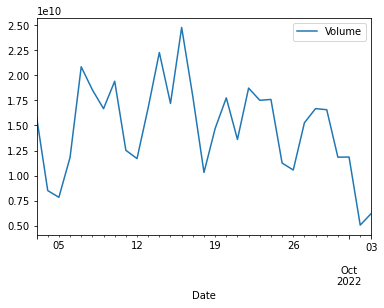

In [275]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.